In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
infile = pd.read_csv("fifa.csv", index_col=0)
infile_stats = infile.describe()

## Player Statistics

In [146]:
age = infile_stats['Age']
avg_age = age['mean']
print("1) The average age of a FIFA player is",
      "{:.2f}".format(avg_age),
      "years old.")

1) The average age of a FIFA player is 25.12 years old.


--------------------------------------------------------------------------------

In [147]:
max_age = age['max']
print("2) The oldest FIFA player is", "{:.2f}".format(max_age),"years old.")

2) The oldest FIFA player is 45.00 years old.


--------------------------------------------------------------------------------

In [148]:
wage = infile['Wage'].apply(lambda x: int(x.strip("€K")))
max_wage = wage.describe()['max']
print("3) The highest paid FIFA player makes",max_wage*1000, "Euros a year.")

3) The highest paid FIFA player makes 565000.0 Euros a year.


## Histogram

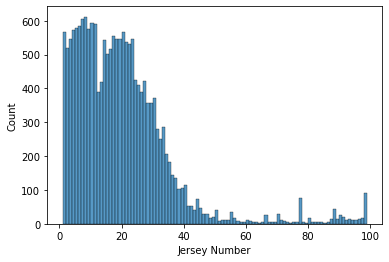

In [149]:
sns.histplot(infile["Jersey Number"],binwidth=1);

From this histogram, we can see that very few players like the jersey number of 13. Interestingly, 14 is not a number preffered by most players.

## Correlation Matrix

In [150]:
corr_mat = pd.DataFrame(infile.corr())

<AxesSubplot:>

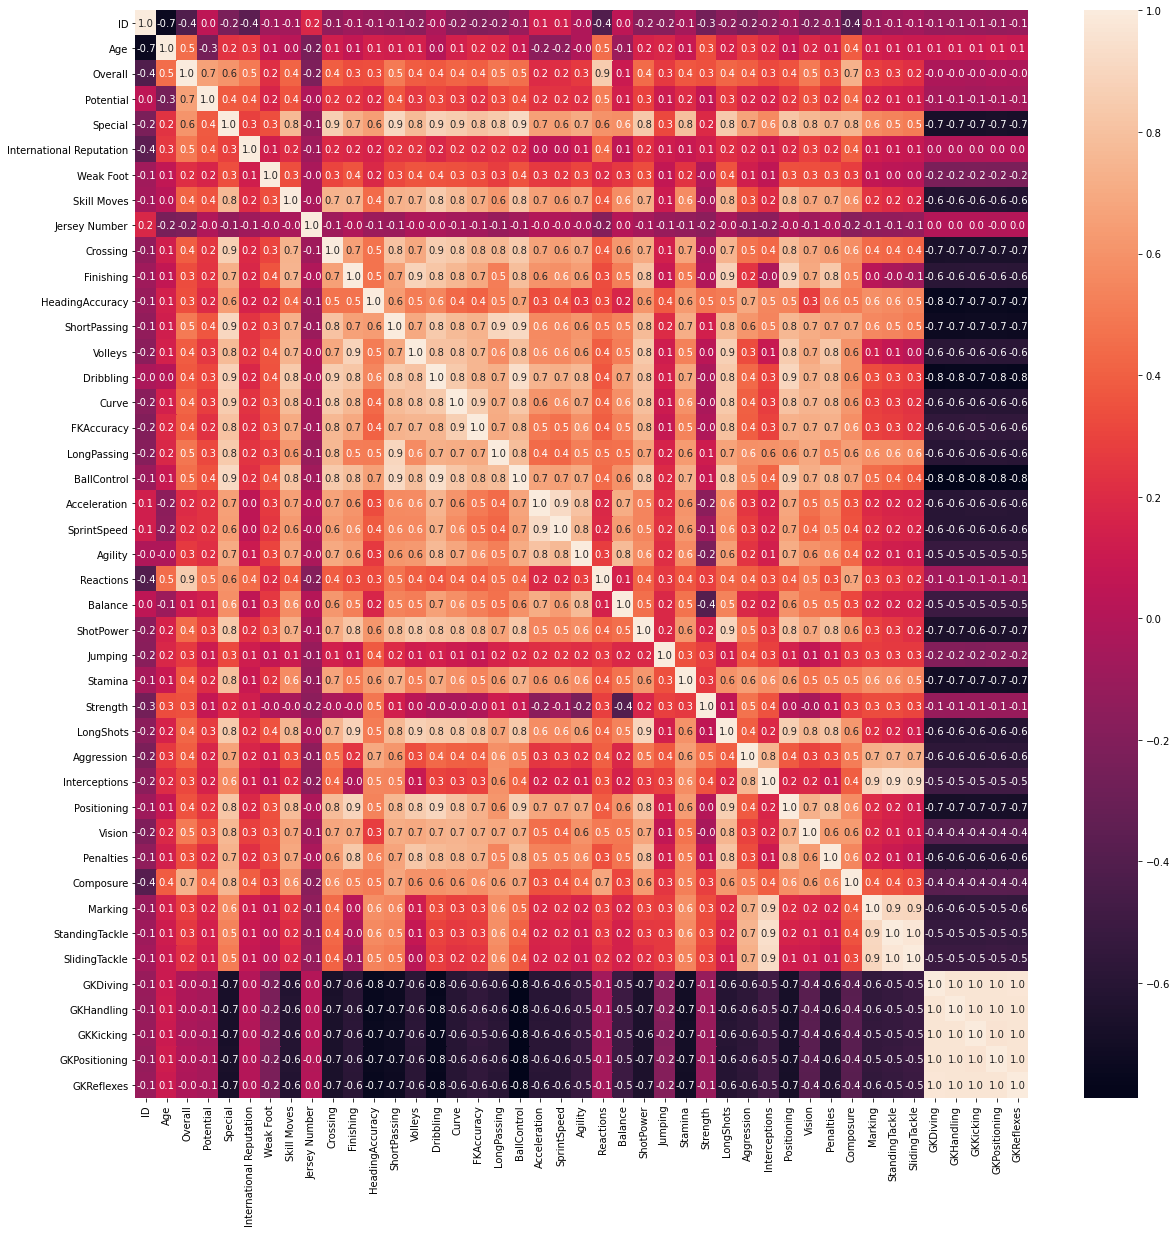

In [151]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True,fmt='.1f', ax=ax)

I found it interesting that Aggression was highly correlated with Heading Accuracy, this sort of makes sense as it is a very aggresive move especially in close quarters where one can be headbutted. 

Ball control and acceleration were also highly correlated and this makes sense because the faster one moves the more precise one must be with the soccer ball in order to create the space necessary for strong strides.

I found Vision to be very interesting because it was highly correlated with a number of other features. This would indicate that soccer relies heavily on visual sensing/processing.

Given this last point, I would certainly use vision as a major input for predicting many of these other features.

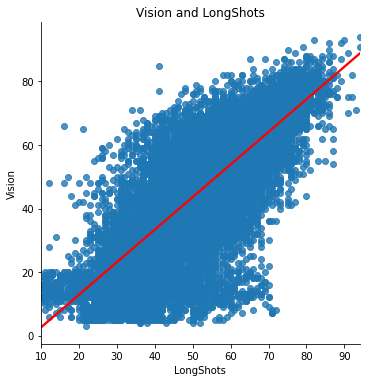

In [152]:
ax = sns.lmplot(data=infile,x='Vision', y='LongShots',line_kws={'color': 'red'});
ax.set(xlabel='LongShots', ylabel='Vision',title='Vision and LongShots');

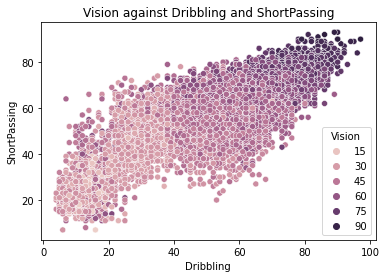

In [153]:
ax = sns.scatterplot(data=infile, x="Dribbling", y="ShortPassing", hue="Vision");
ax.set(title='Vision against Dribbling and ShortPassing');